# Volume 4: Introduction to Initial and Boundary Value Problems

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

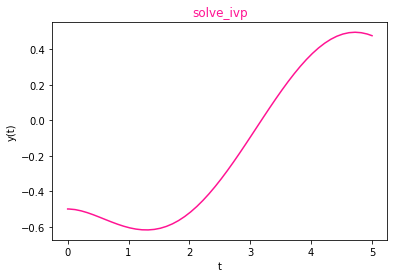

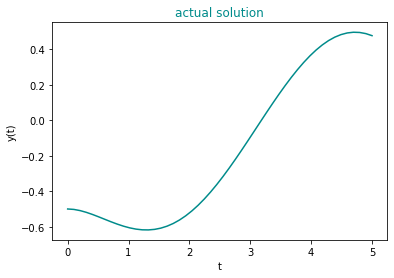

Looking at the two graphs above, we see that using solve_ivp to solve the initial value problem gives the exact same answer as solving the analytic problem, THAT'S what I'm talkin' about!!!


In [5]:
#to use solve_ivp: need to 1st get the 3 elements needed to use it

#element 1: get the ODE function
#to use solve_ivp: always need to change the 2nd order ODE to be a 1st order ODE
#let y_1=y, y_2=y' then get y=[y1,y2].T so y'=([y1,y2].T)' = [y2, sin(t)+y1].T (find this just like ex in lab manual)
def ode(t, y):
    return np.array([y[1], np.sin(t) + y[0]]) #this function defines the ODE system

#element 2: time domain (is tuple of interval of integration)
t_span = (0, 5)

#element 3: the initial condt., is array w/ initial condt of each coord of ODE
y0 = np.array([-1/2, 0])

#NOW: solve system
sol = solve_ivp(ode, t_span, y0, max_step = 0.1) #max_step controls max step size when plot

#plot solve_ivp solution on interval [0,5]:
plt.plot(sol.t,sol.y[0], color = "deeppink")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("solve_ivp", color = "deeppink")
plt.show()

#compare to analytic solution given in prob:
y = lambda t: (-1/2)*(np.exp(-t) + np.sin(t))
t = np.linspace(0,5)

plt.plot(t, y(t), color = "darkcyan")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("actual solution", color = "darkcyan")
plt.show()

print("Looking at the two graphs above, we see that using solve_ivp to solve the initial value problem gives the exact same answer as solving the analytic problem, THAT'S what I'm talkin' about!!!")

### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

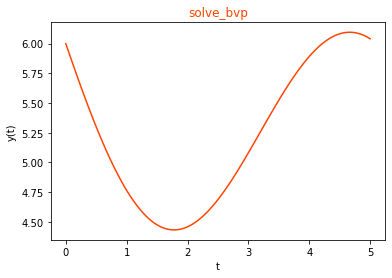

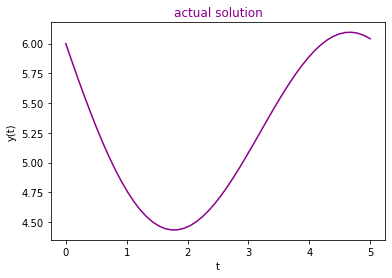

Looking at the two graphs above, we notice that solving the boundary value problem via solve_bvp gives the exact same answer as solving it's analytic problem. WHOOT WHOOT PARTAYYYY


In [6]:
#to use solve_bvp: need 1st change 2nd order ODE into 1st order ODE
#let y1=y, y2=y' then get that the deriv = [y2, -1/4e^(-t/2)+sin(t)-cos(t)-y2].T

#solve_bvp has 4 elements that need:
#element 1: ODE func = defines ODE system just like in solve_ivp
def ode(t, y):
    return np.array([y[1], (-1/4)*np.exp(-t/2) + np.sin(t) - np.cos(t) - y[1]])

#element 2: boundary condt func: array where ya = initial values, yb = final values
#each entry of entry set to 0
def bc(ya,yb):
    return np.array([ya[0] - 6, yb[1] + 0.324705]) #ya[0] here means y(0), ya[1] here means y'(0) and same goes for yb

#element 3: time domain. now linspace from starting to end time containing desired num pts.
t_steps = 100
t = np.linspace(0,5,t_steps)

#element 4: initial guess. want all ones so takes form of np.ones((n, t_steps)) where n is shape of output ODE func
y0 = np.ones((2, t_steps)) #n is 2 here since have y' = [y1', y2'].T

#NOW solve system:
sol = solve_bvp(ode, bc, t, y0)

#plot solution on interval [0,5]:
# here we plot sol.x instead of sol.t
plt.plot(sol.x, sol.y[0], color = "orangered")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("solve_bvp", color = "orangered")
plt.show()

#plot analytic solution so that can compare the 2:
y = lambda t: np.exp((-0.5)*t) - np.sin(t) + 5
t = np.linspace(0,5)

plt.plot(t, y(t), color = "darkmagenta")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("actual solution", color = "darkmagenta")
plt.show()

print("Looking at the two graphs above, we notice that solving the boundary value problem via solve_bvp gives the exact same answer as solving it's analytic problem. WHOOT WHOOT PARTAYYYY")

### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

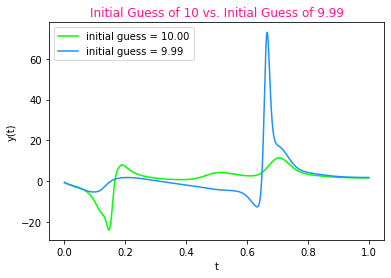

In [7]:
#solve_bvp has 4 elements that need:

#element 1: ODE func to define ODE system
def ode(t, y):
    return np.array([y[1], (1-y[1])*(10*y[0])])

#element 2: boundary condt func
def bc(ya,yb):
    return np.array([ya[0]+1, yb[0]-(3/2)])

#element 3: time domain
t_steps = 50
t = np.linspace(0,1,t_steps) #want over interval [0,1]

#element 4: initial guess. n here still 2 bc have y = [y1, y2]
#need arrays of shape (2, 50) where all entries in array are 10 for 1st sol, 9.99 for 2nd sol
init_guess1 = np.full((2, t_steps), 10)    #make initial guess of 10
init_guess2 = np.full((2, t_steps), 9.99)  #make initial guess of 9.99

#NOW solve system for both initial guesses:
sol_1 = solve_bvp(ode, bc, t, init_guess1) 
sol_2 = solve_bvp(ode, bc, t, init_guess2)

#plot it:
plt.plot(sol_1.x, sol_1.y[0], color = "lime", label = "initial guess = 10.00") #plot the sol w/ initial guess 10
plt.plot(sol_2.x, sol_2.y[0], color = "dodgerblue", label = "initial guess = 9.99") #plot sol w/ initial guess 9.99
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Initial Guess of 10 vs. Initial Guess of 9.99", color = "deeppink")
plt.legend(loc = "best")

plt.show()

### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

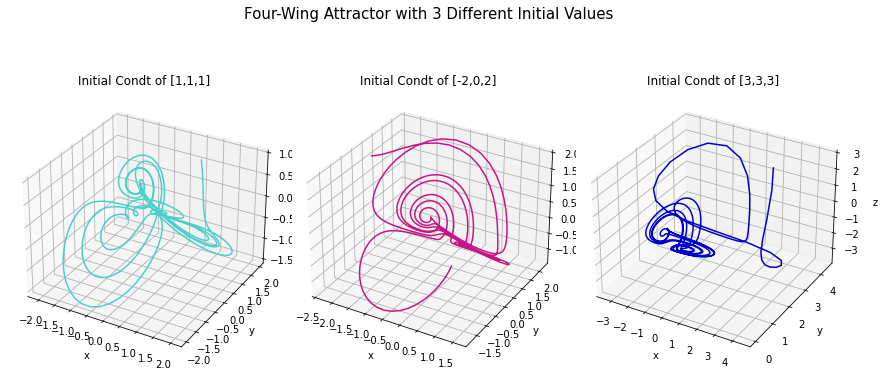

In [43]:
#using solve_ivp so need to get the 3 elements for it

#define the constants a, b, c:
a, b, c = 0.2, 0.01, -0.4

#element 1: 1st order ODE system
#have a state variable which you are able to unpack as x,y,z variables
def ode(t, state):
    x, y, z = state
    
    dx = a*x + y*z
    dy = b*x + c*y - x*z
    dz = -z - x*y
    
    return [dx, dy, dz] #return the ODE system

#element 2: time domain
t_span = (0, 200)

#element 3: initial guess, want 3 different ones
y0_1 = np.array([1, 1, 1]) #1st initial guess 
y0_2 = np.array([-2,0,2])   #2nd initial guess 
y0_3 = np.array([3,3,3])   #3rd initial guess 

#NOW: solve system: solve each system that corresponds to each initial guess
sol_1 = solve_ivp(ode, t_span, y0_1, max_step = 0.1) 
sol_2 = solve_ivp(ode, t_span, y0_2, max_step = 0.1) 
sol_3 = solve_ivp(ode, t_span, y0_3, max_step = 0.1) 

#make 3D plot of each solution:
fig = plt.figure()
plt.suptitle("Four-Wing Attractor with 3 Different Initial Values", fontsize = 15)
fig.set_figheight(6) #use these next 2 lines to make the graphs bigger
fig.set_figwidth(12)

#make the 1st 3D plot for 1st initial guess: so use sol_1
ax = fig.add_subplot(131, projection = '3d')
ax.plot(sol_1.y[0], sol_1.y[1], sol_1.y[2], color = "mediumturquoise") #sol_1.y gives you x,y,z so need to access x,y,z to plot them
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Initial Condt of [1,1,1]")

#make the 2nd 3D plot for 2nd initial guess: so use sol_2
ax = fig.add_subplot(132, projection = '3d')
ax.plot(sol_2.y[0], sol_2.y[1], sol_2.y[2], color = "mediumvioletred") #get x,y,z variables out of sol_2
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Initial Condt of [-2,0,2]")

#make the 3rd 3D plot for 3rd initial guess: so use sol_3
ax = fig.add_subplot(133, projection = '3d')
ax.plot(sol_3.y[0], sol_3.y[1], sol_3.y[2], color = "mediumblue") #get x,y,z variables out of sol_3
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Initial Condt of [3,3,3]")

plt.tight_layout()
plt.show()


## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together.

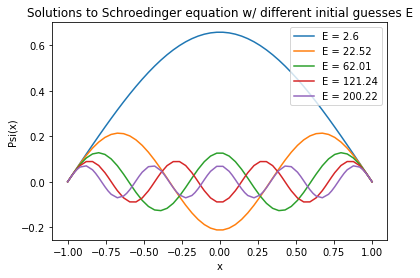

In [66]:
#using solve_bvp but have free parameter E here now

#1st define the ODE system: find it the same way that found it for all the other problems
def ode(x, y, E): #need E variable as argument now bc have free variable and E represents that free variable
    return np.array([y[1], ((x**2)*y[0]) - (E*y[0])]) #y here is psi in the equation we're given

#2nd get boundary condition function: need to include free variable as parameter here
def bcs(ya, yb, E):
    return np.array([ya[0], yb[0], ya[1] - 1])

#3rd get the time domain: (time variable is x here)
x_steps = 50
x = np.linspace(-1,1,x_steps) #want over interval [-1,1] bc those are what the boundary conditions are over

#get the initial guesses for y and free parameter E:
y0 = np.ones((2, x_steps))    #lab manual uses np.ones, so use them here too bc why not
E_guesses = [[2.60], [22.52], [62.01], [121.23], [200.19]]

all_sol = [] #list to store all solutions in for when loop through, get all sol for all of the guesses
#NOW: solve the system, loop through all E guesses and find each solution for each guess
for E_guess in E_guesses:
    all_sol.append(solve_bvp(ode, bcs, x, y0, p=E_guess))

#now loop through all solutions and plot them
plt.title("Solutions to Schroedinger equation w/ different initial guesses E")
for sol in all_sol: 
    plt.plot(sol.x, sol.y[0], label = f"E = {np.round(sol.p[0],2)}")

plt.xlabel('x')
plt.ylabel('Psi(x)')
plt.legend(loc = "best")
plt.show()
